# Frame Information Example
We present the novel View-of-Delft (VoD) automotive dataset. It contains 10.000 frames of synchronized and calibrated 64-layer LiDAR-, (stereo) camera-, and 3+1D radar-data acquired in complex, urban traffic. It consists of more than 76000 3D bounding box annotations, including more than 15000 pedestrian, 7100 cyclist and 17000 car labels.

This example introduces the classes that help to load data from the dataset for a specific frame. The visualization of the data is also included to aid understanding. The outline below provides an overview of the topics covered in this notebook.


## Outline

[Data locations](#data_locations)


[Frame Information](#frame_information): 
[Camera](#frame_information_camera)
[Lidar](#frame_information_lidar)
[Radar](#frame_information_radar)
[Annotations](#frame_information_annotations)

[Combined information](#combined_information)





<a id='data_locations'></a>
## Data locations

The `KittiLocations` class stores the location paths of where the data is expected. By default, the following scheme is used:

```
View-of-Delft-Dataset (root)
    ├── lidar
    │   │── ImageSets
    │   │── training
    │   │   ├──calib & velodyne & image_2 & label_2 & pose
    │   │── testing
    │       ├──calib & velodyne & image_2 & pose
    |
    ├── radar
    │   │── ImageSets
    │   │── training
    │   │   ├──calib & velodyne & image_2 & label_2 & pose
    │   │── testing
    │       ├──calib & velodyne & image_2 & pose
    |
    ├── radar_3_scans
    │   │── ImageSets
    │   │── training
    │   │   ├──calib & velodyne & image_2 & label_2 & pose
    │   │── testing
    │       ├──calib & velodyne & image_2 & pose
    |
    ├── radar_5_scans
        │── ImageSets
        │── training
        │   ├──calib & velodyne & image_2 & label_2 & pose
        │── testing
            ├──calib & velodyne & image_2 & pose
```
If the locations need to be altered, a class similar to `KittiLocations` can be created.

The class required the following arguments:
- `root_dir`: The root directory of the dataset.
- `output_dir`: Optional parameter of the location where output such as pictures should be generated.
- `frame_set_path`: Optional parameter of the text file of which output should be generated.
- `pred_dir`: Optional parameter of the locations of the prediction labels.

Based on these parameters, the location of sub-folders are automatically defined, as shown in the example below:


In [18]:
from vod.configuration import KittiLocations

kitti_locations = KittiLocations(root_dir="example_set",
                                output_dir="example_output",
                                frame_set_path="",
                                pred_dir="",
                                )

print(f"Lidar directory: {kitti_locations.lidar_dir}")
print(f"Radar directory: {kitti_locations.radar_dir}")


Lidar directory: view_of_delft_PUBLIC/lidar/training/velodyne
Radar directory: view_of_delft_PUBLIC/radar/training/velodyne


<a id='frame_information'></a>
## Frame Information

The `FrameDataLoader` class is responsible for loading any possible data from the dataset for a single specific frame. The constructor requires a `KittiLocations` object, and a frame number as an input and creates the properties which can load and store data from the dataset upon request. This means, data is only loaded when required, then stored for further use.

The code snippet below shows how the class can be instantiated.


In [19]:
from vod.frame import FrameDataLoader

frame_data = FrameDataLoader(kitti_locations=kitti_locations,
                             frame_number="01201")

<a id='frame_information_camera'></a>
### Camera
The camera provides colored, rectified images of 1936 × 1216 pixels at around 30 Hz. The horizontal field of view is ~64° (± 32°), vertical field of view is ~ 44° (± 22°). Images are stored in `jpg` files. They can be easily visualized as shown below. Identifiable features such as faces and license plates have been blurred in the example dataset that is located in the GitHub repository.


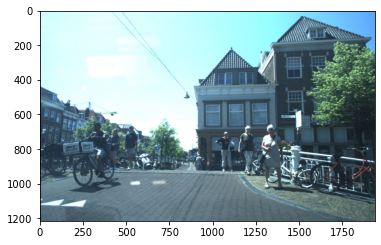

In [20]:
import matplotlib.pyplot as plt

imgplot = plt.imshow(frame_data.image)
plt.show()

<a id='frame_information_lidar'></a>
### LiDAR
The LiDAR sensor is a Velodyne 64 sensor mounted on the top of the vehicle, operating at 10 Hz. The provided LiDAR point clouds are ego-motion compensated both for ego-motion during the scan (i.e. one full rotation of the LiDAR sensor) and ego-motion between the capture of LiDAR and camera data (i.e. overlaying camera and LiDAR data should give a consistent image).

LiDAR point clouds are stored in bin files, where each bin file contains a 360° scan in a form of a Nx4 array, where N is the number of points, and 4 is the number of features: `[x,y,z,reflectance]`.

The example below shows an example of how the raw data can be retrieved, and the points are also plotted in a 3D plot using the `vod_visualization` package, included in the repository.


In [21]:
print(frame_data.lidar_data)

# 3D Visualization of the point-cloud
from vod.visualization import Visualization3D
vis_3d = Visualization3D(frame_data=frame_data)


vis_3d.draw_plot(lidar_origin_plot=True, lidar_points_plot=True)

[[ 2.1638293e+00  2.0774183e+01 -2.3777220e+00  1.7757959e+02]
 [ 1.4999871e+00  2.1448864e+01 -2.3705826e+00  1.6853070e+02]
 [-5.1697153e-01  1.4630976e+01  3.0335397e-01  1.0869550e+02]
 ...
 [-4.8260543e-02  9.1345158e+00 -1.2646477e+00  1.3678928e+02]
 [ 6.2212431e-01  9.2799158e+00 -1.8779116e+00  1.1659936e+02]
 [ 1.5083811e-01  8.8314867e+00 -1.6856109e+00  1.5932019e+02]]


Output()

<a id='frame_information_radar'></a>
### Radar
The radar sensor is a ZF FRGen21 3+1D radar (∼13 Hz) mounted behind the front bumper. The provided radar point clouds are ego-motion compensated for ego-motion between the capture of radar and camera data (i.e. overlaying camera and radar data should give a consistent image). The radar point clouds are stored in bin files, where each bin file contains a set of points in the form of a Nx7 array, where N is the number of points, and 7 is the number of features: [x, y, z, RCS, v_r, v_r_compensated, time]

* v_r is the relative radial velocity
* v_r_compensated is the absolute (i.e. ego motion compensated) radial velocity of the point.
* Time is the time id of the point, indicating which scan it originates from.

Similiar to Lidar, the example shows the retrieval and plotting of the data. The 3D plot also shows one of the superior features of the radar point-cloud compared to lidar, namely that the radial velocity of each measurement is also captured.

In [22]:
print(frame_data.radar_data)

vis_3d.draw_plot(radar_origin_plot=True, radar_points_plot=True, radar_velocity_plot=True)

[[ 5.8320189e-01 -1.4666301e+00 -1.5285575e-01 ... -2.3326685e+00
  -1.6200807e+00  0.0000000e+00]
 [ 1.4879657e+00  9.6896267e-01 -3.7507159e-01 ... -2.1410186e+00
   2.1436045e-02  0.0000000e+00]
 [ 2.1334438e+00  5.0424689e-01 -4.2967945e-01 ... -2.4466901e+00
   5.7735488e-02  0.0000000e+00]
 ...
 [ 7.7119202e+01 -9.2655058e+00  1.1125806e+01 ... -2.5534320e+00
   4.4964189e-03  0.0000000e+00]
 [ 9.0997467e+01  1.7562393e+00  6.9373207e+00 ... -2.5785316e+01
  -2.3176138e+01  0.0000000e+00]
 [ 9.1172897e+01  2.5168958e+00  7.0321832e+00 ... -2.6140804e+00
  -4.4449824e-03  0.0000000e+00]]


Output()

<a id='frame_information_annotations'></a>
### Annotations
The labels include the ground truth data for the frame in kitti format including:

* Class: Describes the type of object: 'Car', 'Pedestrian', 'Cyclist', etc.
* Truncated: Not used, only there to be compatible with KITTI format.
* Occluded: Integer (0,1,2) indicating occlusion state 0 = fully visible, 1 = partly occluded 2 = largely occluded.
* Alpha: Observation angle of object, ranging [-pi..pi]
* Bbox: 2D bounding box of object in the image (0-based index) contains left, top, right, bottom pixel coordinates.
* Dimensions: 3D object dimensions: height, width, length (in meters)
* Location: 3D object location x,y,z in camera coordinates (in meters)
* Rotation: Rotation around -Z axis of the LiDAR sensor [-pi..pi]

In total, 13 object classes were annotated: 13 object classes were annotated:
- Car
- Pedestrian
- Cyclist
- Rider
- Unused bicycle
- Bicycle rack
- Human depiction (e.g. statues)
- Moped or scooter
- Motor
- Truck
- Other ride
- Other vehicle
- Uncertain ride.

Note: This class only provides the raw data, which needs to be processed, as shown in upcoming notebooks.

The example shows the 3D plot of the annotated objects.

In [23]:
vis_3d.draw_plot(annotations_plot=True)

Output()

<a id='combined_information'></a>
## Combined Information
The following plot displays the information that a single frame contains in a combined view. The coordinate systems present, are further explained in Notebook 2: Frame Transformations Example.

In [24]:
vis_3d.draw_plot(radar_origin_plot=True,
                  lidar_origin_plot=True,
                  camera_origin_plot=True,
                  lidar_points_plot=True,
                  radar_points_plot=True,
                  radar_velocity_plot=True,
                  annotations_plot=True)

Output()